In [ ]:
!pip install nsepy
!pip install yfinance


  Preparing metadata (setup.py) ... done
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36056 sha256=fa75086b41098434ea697a8c0d769003cc0f663722fc0360cb812286f65675aa
  Stored in directory: /root/.cache/pip/wheels/4c/87/cb/acaf83f625e5fc73e1fe6e2a8e97680c74cd72391850ef5a86
Successfully built nsepy


In [ ]:
import pandas as pd
import numpy as np
# Getting Stock data using nsepy library
import yfinance as yf
import datetime

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

# install the nsepy library to get stock prices

############################################

today = datetime.date.today()
# print(today)

# Set the stock symbol and date range
symbol = 'AAPL' # Apple stock symbol
start_date = '2000-01-01'
end_date = today

# Fetching the data
StockData=yf.download(symbol, start=start_date, end=end_date)
print(StockData.shape)
StockData.tail(10)

[*********************100%%**********************]  1 of 1 completed
(1230, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-06,176.380005,179.429993,176.210007,179.229996,178.994186,63841300
2023-11-07,179.179993,182.440002,178.970001,181.820007,181.580780,70530000
2023-11-08,182.350006,183.449997,181.589996,182.889999,182.649368,49340300
2023-11-09,182.960007,184.119995,181.809998,182.410004,182.169998,53763500
2023-11-10,183.970001,186.570007,183.529999,186.399994,186.399994,66133400
2023-11-13,185.820007,186.029999,184.210007,184.800003,184.800003,43627500
2023-11-14,187.699997,188.110001,186.300003,187.440002,187.440002,60108400
2023-11-15,187.850006,189.500000,187.779999,188.009995,188.009995,53790500
2023-11-16,189.570007,190.960007,188.649994,189.710007,189.710007,54412900


In [ ]:
Lasttenval=StockData

In [ ]:
# Creating a column as date
StockData['TradeDate']=StockData.index

# Plotting the stock prices
# %matplotlib inline
# StockData.plot(x='TradeDate', y='Close', kind='line', figsize=(20,6), rot=20)

In [ ]:
FullData=StockData[['Close']].values
print(FullData[0:5])

# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#sc = StandardScaler()
sc=MinMaxScaler()

DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)
#X=FullData

print('### After Normalization ###')
X[0:5]

[[39.47999954]
 [35.54750061]
 [37.06499863]
 [36.98249817]
 [37.6875    ]]
### After Normalization ###


array([[0.02444026],
       [0.        ],
       [0.00943117],
       [0.00891843],
       [0.01329998]])

In [ ]:
# split into samples
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=10  # next day's Price Prediction is based on last how many past day's prices

# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

################################################
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('\n#### Input Data shape ####')
print(X_data.shape)

# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
print('\n#### Output Data shape ####')
print(y_data.shape)


#### Input Data shape ####
(1220, 10, 1)

#### Output Data shape ####
(1220, 1)


In [ ]:
# Choosing the number of testing data records
TestingRecords=5

# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

############################################

# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(1215, 10, 1)
(1215, 1)

#### Testing Data shape ####
(5, 10, 1)
(5, 1)


In [ ]:
# Visualizing the input and output being sent to the LSTM model
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp,'--', out)

[[0.02444026]
 [0.        ]
 [0.00943117]
 [0.00891843]
 [0.01329998]
 [0.01727754]
 [0.01803888]
 [0.01569272]
 [0.01213467]
 [0.01690466]] -- [0.01981013]
[[0.        ]
 [0.00943117]
 [0.00891843]
 [0.01329998]
 [0.01727754]
 [0.01803888]
 [0.01569272]
 [0.01213467]
 [0.01690466]
 [0.01981013]] -- [0.02123957]


In [ ]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Second Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Second Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

##################################################

import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

EndTime=time.time()
print("## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ##')

Epoch 1/100
243/243 [==============================] - 5s 8ms/step - loss: 0.0505
Epoch 2/100
243/243 [==============================] - 2s 8ms/step - loss: 0.0024
Epoch 3/100
243/243 [==============================] - 2s 8ms/step - loss: 0.0014
Epoch 4/100
243/243 [==============================] - 2s 8ms/step - loss: 0.0014
Epoch 5/100
243/243 [==============================] - 2s 10ms/step - loss: 0.0013
Epoch 6/100
243/243 [==============================] - 3s 13ms/step - loss: 0.0013
Epoch 7/100
243/243 [==============================] - 2s 8ms/step - loss: 0.0012
Epoch 8/100
243/243 [==============================] - 2s 8ms/step - loss: 0.0013
Epoch 9/100
243/243 [==============================] - 2s 8ms/step - loss: 0.0013
Epoch 10/100
243/243 [==============================] - 2s 8ms/step - loss: 0.0013
Epoch 11/100
243/243 [==============================] - 2s 8ms/step - loss: 0.0012
Epoch 12/100
243/243 [==============================] - 3s 14ms/step - loss: 0.0013
Epoch 13/1

1/1 [==============================] - 1s 716ms/step
Accuracy: 98.90759122271893


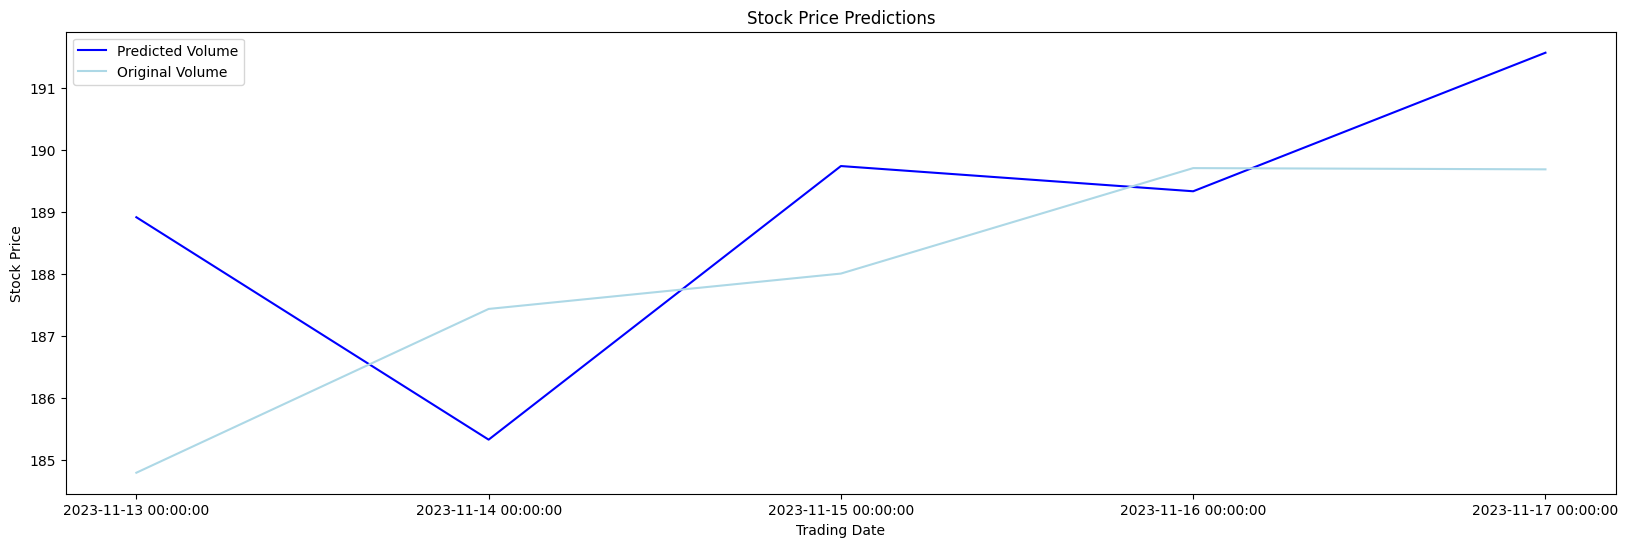

In [ ]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)

# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)

# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price)/orig)).mean())

# Visualising the results
import matplotlib.pyplot as plt

plt.plot(predicted_Price, color = 'blue', label = 'Predicted Volume')
plt.plot(orig, color = 'lightblue', label = 'Original Volume')

plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(range(TestingRecords), StockData.tail(TestingRecords)['TradeDate'])
plt.ylabel('Stock Price')

plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

In [ ]:
# Last 10 days prices
Last10Days=StockData['Close'][-10:].values.tolist()


# Normalizing the data just like we did for training the model
Last10Days=DataScaler.transform(Last10Days.reshape(-1,1))

# Changing the shape of the data to 3D
# Choosing TimeSteps as 10 because we have used the same for training
NumSamples=1
TimeSteps=10
NumFeatures=1
Last10Days=Last10Days.reshape(NumSamples,TimeSteps,NumFeatures)

#############################

# Making predictions on data
predicted_Price = regressor.predict(Last10Days)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
predicted_Price

1/1 [==============================] - 0s 24ms/step


array([[156.76163]], dtype=float32)

1/1 [==============================] - 0s 31ms/step


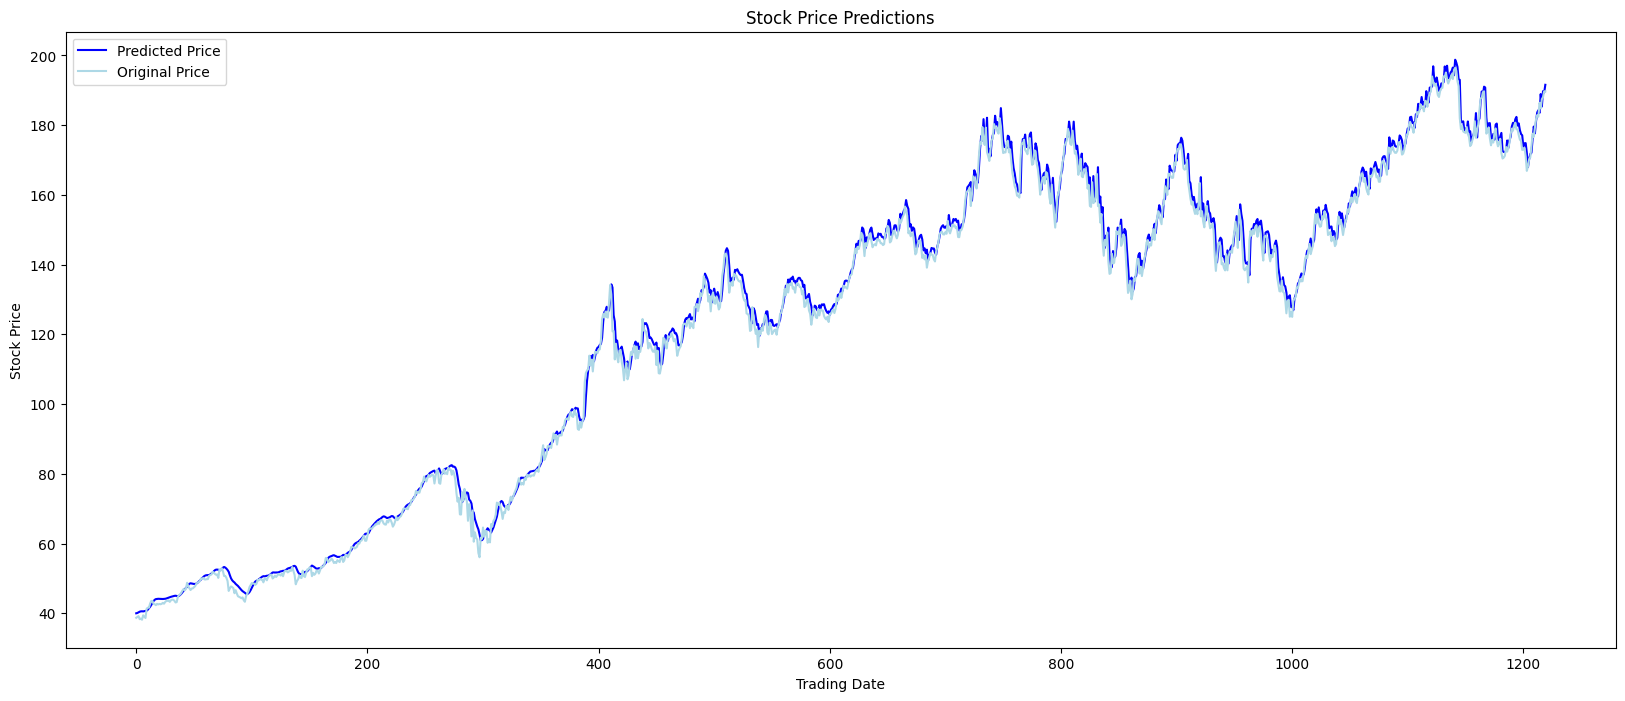

In [ ]:
# Generating predictions on full data
TrainPredictions=DataScaler.inverse_transform(regressor.predict(X_train))
TestPredictions=DataScaler.inverse_transform(regressor.predict(X_test))

FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=FullData[TimeSteps:]

# plotting the full data
plt.plot(FullDataPredictions, color = 'blue', label = 'Predicted Price')
plt.plot(FullDataOrig , color = 'lightblue', label = 'Original Price')


plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()

In [ ]:
# Considering the Full Data again which we extracted above
# Printing the last 10 values
print('Original Prices')
print(FullData[-10:])

print('###################')

# Printing last 10 values of the scaled data which we have created above for the last model
# Here I am changing the shape of the data to one dimensional array because
# for Multi step data preparation we need to X input in this fashion
X=X.reshape(X.shape[0],)
print('Scaled Prices')
print(X[-10:])

Original Prices
[[179.22999573]
 [181.82000732]
 [182.88999939]
 [182.41000366]
 [186.3999939 ]
 [184.80000305]
 [187.44000244]
 [188.00999451]
 [189.71000671]
 [189.69000244]]
###################
Scaled Prices
[0.89297866 0.90907543 0.91572537 0.91274223 0.93753979 0.92759594
 0.94400339 0.94754586 0.95811134 0.95798701]


In [ ]:
# Multi step data preparation

# split into samples
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=10  # next few day's Price Prediction is based on last how many past day's prices
FutureTimeSteps=5 # How many days in future you want to predict the prices

# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows-FutureTimeSteps , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i:i+FutureTimeSteps]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

################################################

# Reshape the Input as a 3D (samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('### Input Data Shape ###')
print(X_data.shape)

# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
print('### Output Data Shape ###')
print(y_data.shape)

### Input Data Shape ###
(1215, 10, 1)
### Output Data Shape ###
(1215, 5)


In [ ]:
# Choosing the number of testing data records
TestingRecords=5

# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

#############################################
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)

print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(1210, 10, 1)
(1210, 5)

#### Testing Data shape ####
(5, 10, 1)
(5, 5)


In [ ]:
# Visualizing the input and output being sent to the LSTM model
# Based on last 10 days prices we are learning the next 5 days of prices
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp)
    print('====>')
    print(out)
    print('#'*20)

[[0.02444026]
 [0.        ]
 [0.00943117]
 [0.00891843]
 [0.01329998]
 [0.01727754]
 [0.01803888]
 [0.01569272]
 [0.01213467]
 [0.01690466]]
====>
[0.01981013 0.02123957 0.02273117 0.01726201 0.01822532]
####################
[[0.        ]
 [0.00943117]
 [0.00891843]
 [0.01329998]
 [0.01727754]
 [0.01803888]
 [0.01569272]
 [0.01213467]
 [0.01690466]
 [0.01981013]]
====>
[0.02123957 0.02273117 0.01726201 0.01822532 0.01632976]
####################


In [ ]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
# Initialising the RNN
regressor = Sequential()
es=EarlyStopping(monitor="val_loss",patience=10)
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))


# Adding the Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


# Adding the output layer
# Notice the number of neurons in the dense layer is now the number of future time steps
# Based on the number of future days we want to predict
regressor.add(Dense(units = FutureTimeSteps))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

###################################################################

import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 200,callbacks=[es])

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/200
240/242 [============================>.] - ETA: 0s - loss: 0.2150

242/242 [==============================] - 5s 10ms/step - loss: 0.2139
Epoch 2/200
239/242 [============================>.] - ETA: 0s - loss: 0.0895

242/242 [==============================] - 3s 13ms/step - loss: 0.0895
Epoch 3/200
241/242 [============================>.] - ETA: 0s - loss: 0.0795

242/242 [==============================] - 2s 9ms/step - loss: 0.0795
Epoch 4/200
239/242 [============================>.] - ETA: 0s - loss: 0.0793

242/242 [==============================] - 2s 8ms/step - loss: 0.0793
Epoch 5/200
239/242 [============================>.] - ETA: 0s - loss: 0.0789

242/242 [==============================] - 2s 8ms/step - loss: 0.0790
Epoch 6/200
242/242 [==============================] - ETA: 0s - loss: 0.0792

242/242 [==============================] - 2s 8ms/step - loss: 0.0792
Epoch 7/200
238/242 [============================>.] - ETA: 0s - loss: 0.0796

242/242 [==============================] - 2s 8ms/step - loss: 0.0794
Epoch 8/200
241/242 [============================>.] - ETA: 0s - loss: 0.0795

242/242 [==============================] - 3s 12ms/step - loss: 0.0795
Epoch 9/200
242/242 [==============================] - ETA: 0s - loss: 0.0792

242/242 [==============================] - 3s 12ms/step - loss: 0.0792
Epoch 10/200
240/242 [============================>.] - ETA: 0s - loss: 0.0794

242/242 [==============================] - 2s 8ms/step - loss: 0.0792
Epoch 11/200
241/242 [============================>.] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 2s 8ms/step - loss: 0.0790
Epoch 12/200
239/242 [============================>.] - ETA: 0s - loss: 0.0793

242/242 [==============================] - 2s 8ms/step - loss: 0.0789
Epoch 13/200
242/242 [==============================] - ETA: 0s - loss: 0.0791

242/242 [==============================] - 2s 8ms/step - loss: 0.0791
Epoch 14/200
242/242 [==============================] - ETA: 0s - loss: 0.0789

242/242 [==============================] - 2s 10ms/step - loss: 0.0789
Epoch 15/200
242/242 [==============================] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 3s 13ms/step - loss: 0.0790
Epoch 16/200
240/242 [============================>.] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 2s 9ms/step - loss: 0.0790
Epoch 17/200
242/242 [==============================] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 2s 8ms/step - loss: 0.0790
Epoch 18/200
236/242 [============================>.] - ETA: 0s - loss: 0.0794

242/242 [==============================] - 2s 8ms/step - loss: 0.0791
Epoch 19/200
239/242 [============================>.] - ETA: 0s - loss: 0.0798

242/242 [==============================] - 2s 8ms/step - loss: 0.0795
Epoch 20/200
240/242 [============================>.] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 2s 8ms/step - loss: 0.0791
Epoch 21/200
240/242 [============================>.] - ETA: 0s - loss: 0.0789

242/242 [==============================] - 5s 20ms/step - loss: 0.0791
Epoch 22/200
240/242 [============================>.] - ETA: 0s - loss: 0.0792

242/242 [==============================] - 5s 19ms/step - loss: 0.0792
Epoch 23/200
238/242 [============================>.] - ETA: 0s - loss: 0.0792

242/242 [==============================] - 2s 8ms/step - loss: 0.0792
Epoch 24/200
237/242 [============================>.] - ETA: 0s - loss: 0.0787

242/242 [==============================] - 2s 8ms/step - loss: 0.0791
Epoch 25/200
242/242 [==============================] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 2s 8ms/step - loss: 0.0790
Epoch 26/200
240/242 [============================>.] - ETA: 0s - loss: 0.0793

242/242 [==============================] - 3s 13ms/step - loss: 0.0790
Epoch 27/200
237/242 [============================>.] - ETA: 0s - loss: 0.0788

242/242 [==============================] - 3s 11ms/step - loss: 0.0789
Epoch 28/200
238/242 [============================>.] - ETA: 0s - loss: 0.0789

242/242 [==============================] - 2s 8ms/step - loss: 0.0791
Epoch 29/200
242/242 [==============================] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 2s 8ms/step - loss: 0.0790
Epoch 30/200
236/242 [============================>.] - ETA: 0s - loss: 0.0791

242/242 [==============================] - 2s 8ms/step - loss: 0.0790
Epoch 31/200
238/242 [============================>.] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 2s 8ms/step - loss: 0.0793
Epoch 32/200
241/242 [============================>.] - ETA: 0s - loss: 0.0789

242/242 [==============================] - 2s 10ms/step - loss: 0.0790
Epoch 33/200
242/242 [==============================] - ETA: 0s - loss: 0.0789

242/242 [==============================] - 3s 13ms/step - loss: 0.0789
Epoch 34/200
241/242 [============================>.] - ETA: 0s - loss: 0.0785

242/242 [==============================] - 2s 8ms/step - loss: 0.0787
Epoch 35/200
241/242 [============================>.] - ETA: 0s - loss: 0.0794

242/242 [==============================] - 2s 8ms/step - loss: 0.0792
Epoch 36/200
239/242 [============================>.] - ETA: 0s - loss: 0.0787

242/242 [==============================] - 2s 8ms/step - loss: 0.0790
Epoch 37/200
242/242 [==============================] - ETA: 0s - loss: 0.0789

242/242 [==============================] - 2s 8ms/step - loss: 0.0789
Epoch 38/200
242/242 [==============================] - ETA: 0s - loss: 0.0792

242/242 [==============================] - 2s 8ms/step - loss: 0.0792
Epoch 39/200
239/242 [============================>.] - ETA: 0s - loss: 0.0788

242/242 [==============================] - 3s 13ms/step - loss: 0.0791
Epoch 40/200
239/242 [============================>.] - ETA: 0s - loss: 0.0794

242/242 [==============================] - 2s 10ms/step - loss: 0.0789
Epoch 41/200
240/242 [============================>.] - ETA: 0s - loss: 0.0782

242/242 [==============================] - 4s 17ms/step - loss: 0.0788
Epoch 42/200
237/242 [============================>.] - ETA: 0s - loss: 0.0791

242/242 [==============================] - 4s 17ms/step - loss: 0.0789
Epoch 43/200
241/242 [============================>.] - ETA: 0s - loss: 0.0791

242/242 [==============================] - 3s 12ms/step - loss: 0.0789
Epoch 44/200
241/242 [============================>.] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 3s 11ms/step - loss: 0.0790
Epoch 45/200
240/242 [============================>.] - ETA: 0s - loss: 0.0785

242/242 [==============================] - 2s 8ms/step - loss: 0.0786
Epoch 46/200
237/242 [============================>.] - ETA: 0s - loss: 0.0791

242/242 [==============================] - 2s 8ms/step - loss: 0.0791
Epoch 47/200
236/242 [============================>.] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 2s 8ms/step - loss: 0.0792
Epoch 48/200
240/242 [============================>.] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 3s 11ms/step - loss: 0.0791
Epoch 49/200
241/242 [============================>.] - ETA: 0s - loss: 0.0789

242/242 [==============================] - 5s 23ms/step - loss: 0.0789
Epoch 50/200
240/242 [============================>.] - ETA: 0s - loss: 0.0791

242/242 [==============================] - 3s 13ms/step - loss: 0.0790
Epoch 51/200
239/242 [============================>.] - ETA: 0s - loss: 0.0791

242/242 [==============================] - 2s 8ms/step - loss: 0.0791
Epoch 52/200
241/242 [============================>.] - ETA: 0s - loss: 0.0791

242/242 [==============================] - 2s 8ms/step - loss: 0.0791
Epoch 53/200
241/242 [============================>.] - ETA: 0s - loss: 0.0788

242/242 [==============================] - 4s 16ms/step - loss: 0.0789
Epoch 54/200
240/242 [============================>.] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 4s 18ms/step - loss: 0.0789
Epoch 55/200
236/242 [============================>.] - ETA: 0s - loss: 0.0791

242/242 [==============================] - 2s 8ms/step - loss: 0.0789
Epoch 56/200
236/242 [============================>.] - ETA: 0s - loss: 0.0786

242/242 [==============================] - 2s 8ms/step - loss: 0.0790
Epoch 57/200
242/242 [==============================] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 2s 8ms/step - loss: 0.0790
Epoch 58/200
237/242 [============================>.] - ETA: 0s - loss: 0.0792

242/242 [==============================] - 2s 8ms/step - loss: 0.0791
Epoch 59/200
241/242 [============================>.] - ETA: 0s - loss: 0.0789

242/242 [==============================] - 2s 8ms/step - loss: 0.0791
Epoch 60/200
240/242 [============================>.] - ETA: 0s - loss: 0.0793

242/242 [==============================] - 3s 12ms/step - loss: 0.0791
Epoch 61/200
240/242 [============================>.] - ETA: 0s - loss: 0.0788

242/242 [==============================] - 3s 11ms/step - loss: 0.0790
Epoch 62/200
237/242 [============================>.] - ETA: 0s - loss: 0.0788

242/242 [==============================] - 2s 8ms/step - loss: 0.0790
Epoch 63/200
240/242 [============================>.] - ETA: 0s - loss: 0.0785

242/242 [==============================] - 2s 9ms/step - loss: 0.0787
Epoch 64/200
240/242 [============================>.] - ETA: 0s - loss: 0.0788

242/242 [==============================] - 3s 14ms/step - loss: 0.0788
Epoch 65/200
239/242 [============================>.] - ETA: 0s - loss: 0.0787

242/242 [==============================] - 2s 9ms/step - loss: 0.0787
Epoch 66/200
241/242 [============================>.] - ETA: 0s - loss: 0.0788

242/242 [==============================] - 5s 19ms/step - loss: 0.0789
Epoch 67/200
242/242 [==============================] - ETA: 0s - loss: 0.0789

242/242 [==============================] - 3s 11ms/step - loss: 0.0789
Epoch 68/200
240/242 [============================>.] - ETA: 0s - loss: 0.0791

242/242 [==============================] - 3s 13ms/step - loss: 0.0790
Epoch 69/200
239/242 [============================>.] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 2s 8ms/step - loss: 0.0792
Epoch 70/200
238/242 [============================>.] - ETA: 0s - loss: 0.0788

242/242 [==============================] - 2s 8ms/step - loss: 0.0789
Epoch 71/200
239/242 [============================>.] - ETA: 0s - loss: 0.0788

242/242 [==============================] - 3s 13ms/step - loss: 0.0790
Epoch 72/200
242/242 [==============================] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 4s 15ms/step - loss: 0.0790
Epoch 73/200
242/242 [==============================] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 2s 9ms/step - loss: 0.0790
Epoch 74/200
241/242 [============================>.] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 2s 8ms/step - loss: 0.0789
Epoch 75/200
240/242 [============================>.] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 2s 8ms/step - loss: 0.0789
Epoch 76/200
239/242 [============================>.] - ETA: 0s - loss: 0.0786

242/242 [==============================] - 2s 8ms/step - loss: 0.0789
Epoch 77/200
242/242 [==============================] - ETA: 0s - loss: 0.0789

242/242 [==============================] - 3s 13ms/step - loss: 0.0789
Epoch 78/200
241/242 [============================>.] - ETA: 0s - loss: 0.0788

242/242 [==============================] - 4s 15ms/step - loss: 0.0789
Epoch 79/200
241/242 [============================>.] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 2s 8ms/step - loss: 0.0790
Epoch 80/200
242/242 [==============================] - ETA: 0s - loss: 0.0789

242/242 [==============================] - 3s 11ms/step - loss: 0.0789
Epoch 81/200
242/242 [==============================] - ETA: 0s - loss: 0.0788

242/242 [==============================] - 4s 15ms/step - loss: 0.0788
Epoch 82/200
240/242 [============================>.] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 5s 21ms/step - loss: 0.0788
Epoch 83/200
242/242 [==============================] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 4s 17ms/step - loss: 0.0790
Epoch 84/200
241/242 [============================>.] - ETA: 0s - loss: 0.0789

242/242 [==============================] - 2s 10ms/step - loss: 0.0790
Epoch 85/200
240/242 [============================>.] - ETA: 0s - loss: 0.0791

242/242 [==============================] - 3s 11ms/step - loss: 0.0790
Epoch 86/200
242/242 [==============================] - ETA: 0s - loss: 0.0785

242/242 [==============================] - 3s 12ms/step - loss: 0.0785
Epoch 87/200
239/242 [============================>.] - ETA: 0s - loss: 0.0789

242/242 [==============================] - 3s 12ms/step - loss: 0.0789
Epoch 88/200
242/242 [==============================] - ETA: 0s - loss: 0.0788

242/242 [==============================] - 2s 8ms/step - loss: 0.0788
Epoch 89/200
240/242 [============================>.] - ETA: 0s - loss: 0.0789

242/242 [==============================] - 2s 8ms/step - loss: 0.0788
Epoch 90/200
241/242 [============================>.] - ETA: 0s - loss: 0.0787

242/242 [==============================] - 2s 8ms/step - loss: 0.0788
Epoch 91/200
239/242 [============================>.] - ETA: 0s - loss: 0.0791

242/242 [==============================] - 2s 8ms/step - loss: 0.0788
Epoch 92/200
240/242 [============================>.] - ETA: 0s - loss: 0.0791

242/242 [==============================] - 2s 9ms/step - loss: 0.0789
Epoch 93/200
240/242 [============================>.] - ETA: 0s - loss: 0.0791

242/242 [==============================] - 3s 13ms/step - loss: 0.0788
Epoch 94/200
236/242 [============================>.] - ETA: 0s - loss: 0.0786

242/242 [==============================] - 2s 9ms/step - loss: 0.0788
Epoch 95/200
237/242 [============================>.] - ETA: 0s - loss: 0.0791

242/242 [==============================] - 2s 8ms/step - loss: 0.0790
Epoch 96/200
241/242 [============================>.] - ETA: 0s - loss: 0.0784

242/242 [==============================] - 2s 8ms/step - loss: 0.0784
Epoch 97/200
237/242 [============================>.] - ETA: 0s - loss: 0.0792

242/242 [==============================] - 2s 8ms/step - loss: 0.0788
Epoch 98/200
239/242 [============================>.] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 3s 13ms/step - loss: 0.0790
Epoch 99/200
239/242 [============================>.] - ETA: 0s - loss: 0.0791

242/242 [==============================] - 3s 13ms/step - loss: 0.0789
Epoch 100/200
241/242 [============================>.] - ETA: 0s - loss: 0.0786

242/242 [==============================] - 2s 10ms/step - loss: 0.0789
Epoch 101/200
241/242 [============================>.] - ETA: 0s - loss: 0.0787

242/242 [==============================] - 2s 8ms/step - loss: 0.0787
Epoch 102/200
239/242 [============================>.] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 2s 8ms/step - loss: 0.0789
Epoch 103/200
237/242 [============================>.] - ETA: 0s - loss: 0.0792

242/242 [==============================] - 2s 8ms/step - loss: 0.0788
Epoch 104/200
241/242 [============================>.] - ETA: 0s - loss: 0.0789

242/242 [==============================] - 2s 8ms/step - loss: 0.0788
Epoch 105/200
239/242 [============================>.] - ETA: 0s - loss: 0.0789

242/242 [==============================] - 3s 11ms/step - loss: 0.0790
Epoch 106/200
238/242 [============================>.] - ETA: 0s - loss: 0.0787

242/242 [==============================] - 3s 12ms/step - loss: 0.0788
Epoch 107/200
236/242 [============================>.] - ETA: 0s - loss: 0.0791

242/242 [==============================] - 2s 8ms/step - loss: 0.0790
Epoch 108/200
240/242 [============================>.] - ETA: 0s - loss: 0.0790

242/242 [==============================] - 2s 8ms/step - loss: 0.0791
Epoch 109/200
 62/242 [======>.......................] - ETA: 1s - loss: 0.0787

KeyboardInterrupt: ignored

In [ ]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
print('#### Predicted Prices ####')
print(predicted_Price)

# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
print('\n#### Original Prices ####')
print(orig)

1/1 [==============================] - 0s 473ms/step
#### Predicted Prices ####
[[155.01306 154.58281 156.02454 155.86319 155.65045]
 [154.07912 153.68893 155.06825 154.81439 154.82527]
 [156.46985 156.0152  157.48982 157.32864 157.08873]
 [158.23686 157.78093 159.27565 159.1364  158.83879]
 [156.71223 156.29443 157.71854 157.46321 157.4401 ]]

#### Original Prices ####
[[155.         157.3999939  159.27999878 157.83000183 158.92999268]
 [157.3999939  159.27999878 157.83000183 158.92999268 160.25      ]
 [159.27999878 157.83000183 158.92999268 160.25       158.27999878]
 [157.83000183 158.92999268 160.25       158.27999878 157.6499939 ]
 [158.92999268 160.25       158.27999878 157.6499939  160.77000427]]


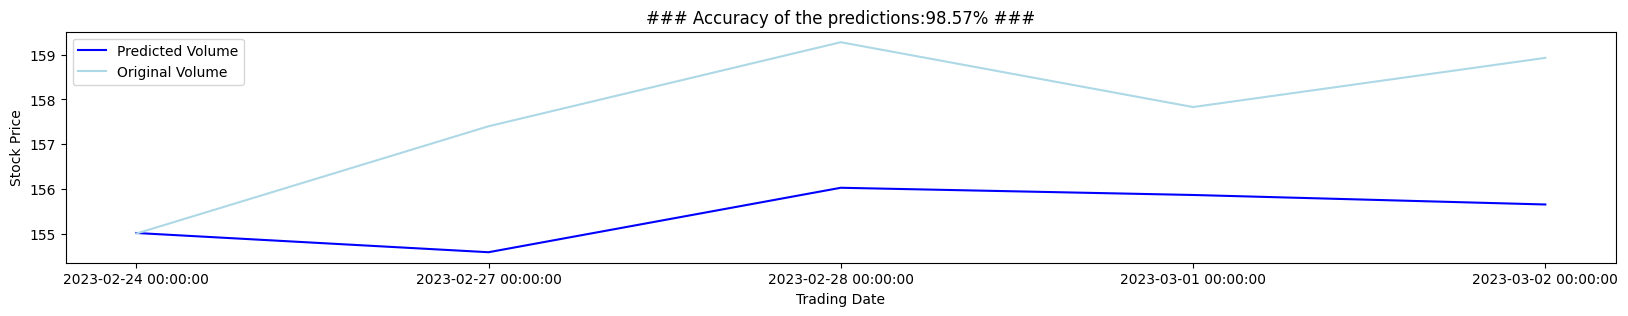

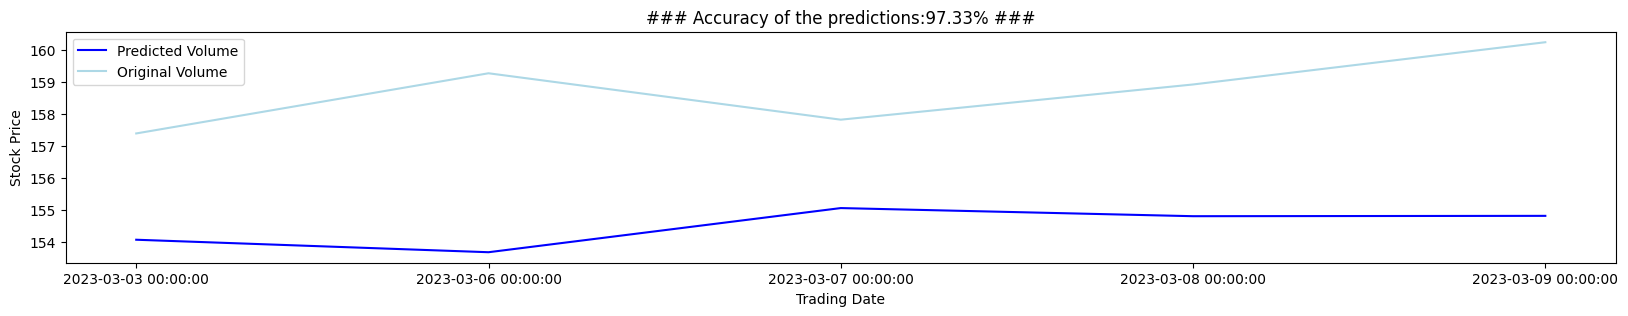

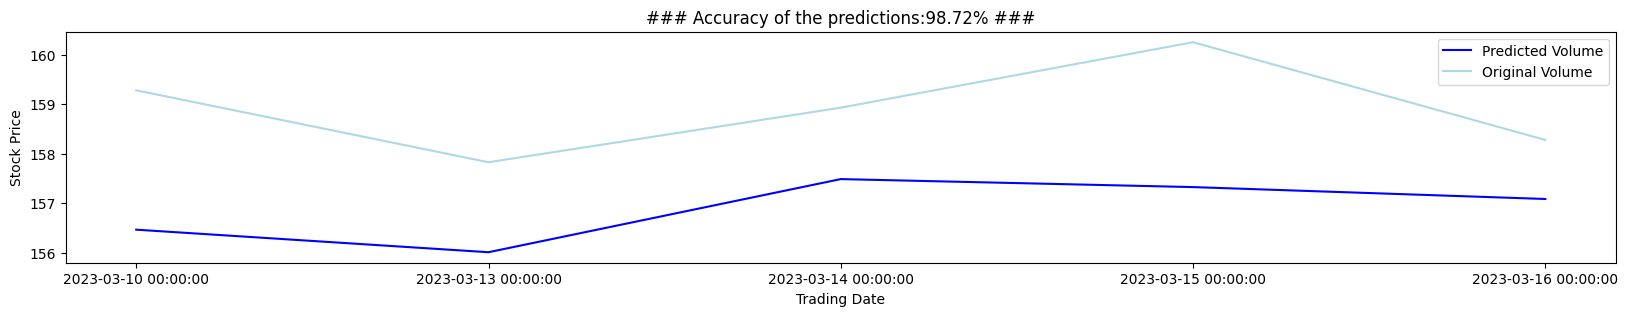

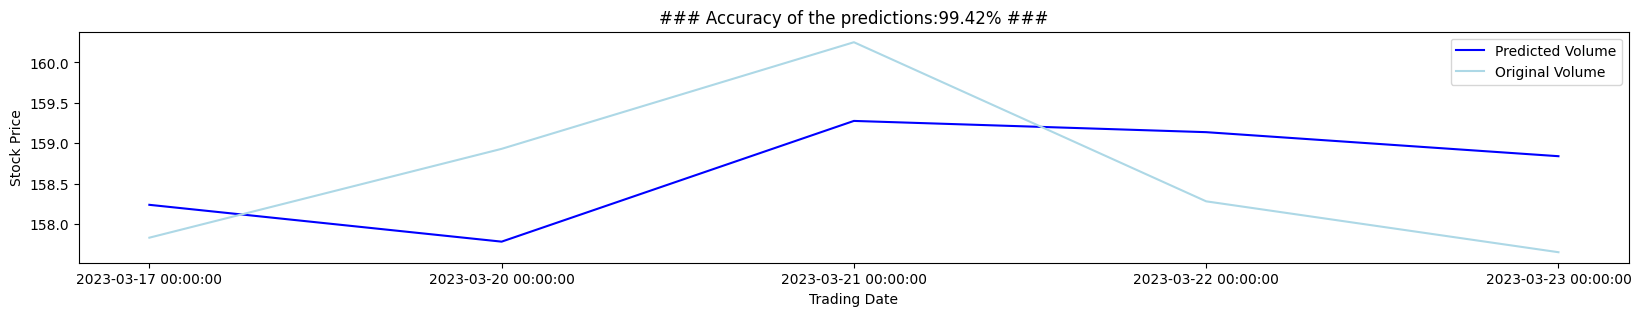

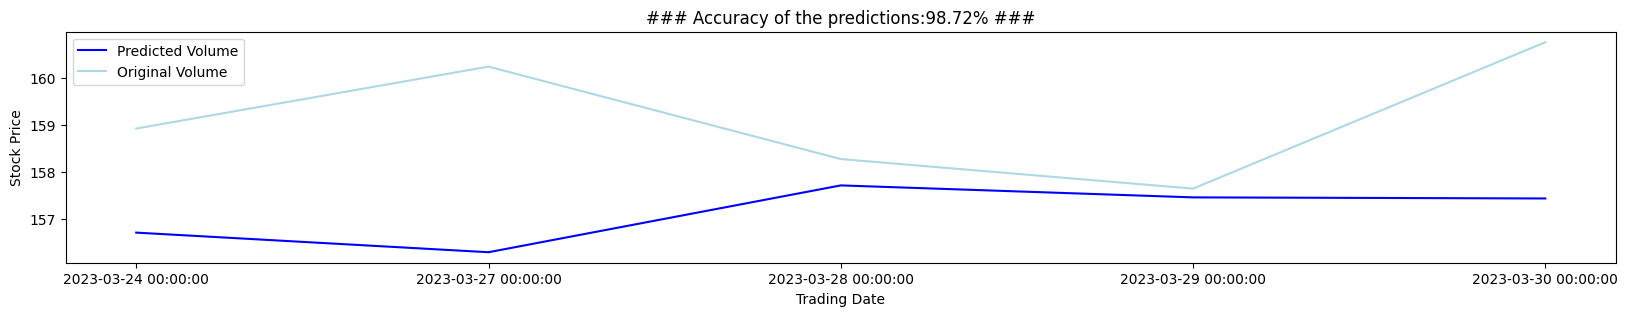

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(orig)):
    Prediction=predicted_Price[i]
    Original=orig[i]

    # Visualising the results
    plt.plot(Prediction, color = 'blue', label = 'Predicted Volume')
    plt.plot(Original, color = 'lightblue', label = 'Original Volume')

    plt.title('### Accuracy of the predictions:'+ str(100 - (100*(abs(Original-Prediction)/Original)).mean().round(2))+'% ###')
    plt.xlabel('Trading Date')

    startDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1)
    endDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1) + FutureTimeSteps
    TotalRows=StockData.shape[0]

    plt.xticks(range(FutureTimeSteps), StockData.iloc[TotalRows-endDateIndex : TotalRows-(startDateIndex) , :]['TradeDate'])
    plt.ylabel('Stock Price')

    plt.legend()
    fig=plt.gcf()
    fig.set_figwidth(20)
    fig.set_figheight(3)
    plt.show()

In [ ]:
# Making predictions on test data
Last10DaysPrices=np.array([162.360001,160.770004,157.649994,158.279999,160.250000,158.929993,157.830002,159.279999,157.399994,155.000000])

# Reshaping the data to (-1,1 )because its a single entry
Last10DaysPrices=Last10DaysPrices.reshape(-1, 1)

# Scaling the data on the same level on which model was trained
X_test=DataScaler.transform(Last10DaysPrices)

NumberofSamples=1
TimeSteps=X_test.shape[0]
NumberofFeatures=X_test.shape[1]
# Reshaping the data as 3D input
X_test=X_test.reshape(NumberofSamples,TimeSteps,NumberofFeatures)

# Generating the predictions for next 5 days
Next5DaysPrice = regressor.predict(X_test)

# Generating the prices in original scale
Next5DaysPrice = DataScaler.inverse_transform(Next5DaysPrice)
Next5DaysPrice

1/1 [==============================] - 0s 24ms/step


array([[153.79706, 153.46323, 154.73906, 154.24498, 154.78879]],
      dtype=float32)